# Pymaceuticals Inc.
---

### Comparative Analysis of Capomulin and Other Drug Regimens for Squamous Cell Carcinoma Treatment in Mice



### Abstract:
In this study, we analyze the efficacy of Capomulin, Infubinol, and Ceftamin in treating squamous cell carcinoma in mice. We investigate the relationship between mouse weight and tumor volume (TV), compare the final TV distribution for each drug, and explore the Capomulin treatment of a specific mouse (l509). Our analysis reveals that Capomulin is more effective at shrinking tumors compared to Infubinol and Ceftamin, but further research is needed to identify other variables and potential side effects.

### Introduction:
Squamous cell carcinoma is a common type of cancer that arises from squamous cells found in the skin, respiratory and digestive tracts, and other areas of the body. This study aims to determine the efficacy of Capomulin, Infubinol, and Ceftamin in treating squamous cell carcinoma in mice by examining the relationship between mouse weight and TV, as well as evaluating the treatment of mouse l509 with Capomulin.

### Methodology:
A cohort of mice was treated with Capomulin, Infubinol, and Ceftamin. The mice were monitored over a period, and their weights and TV were recorded. Regression analysis, quartile and box plot analyses, and a case study of mouse l509 were conducted to evaluate the efficacy of each drug.

### Results:

3.1 Relationship between Mouse Weight and Tumor Volume:
A positive correlation (r = 0.84) was observed between average mouse weight and average TV, indicating a strong association between the two variables.

3.2 Comparison of Drug Efficacy:
The final TV distribution for mice treated with Capomulin was lower than those treated with Infubinol and Ceftamin, suggesting that Capomulin is more effective at shrinking tumors. Capomulin's effectiveness appeared comparable to Ramicane. One outlier in the Infubinol subset had a TV in the same range as Capomulin, but further investigation is required to determine the cause.

3.3 Capomulin Treatment of Mouse l509:
Capomulin effectively reduced mouse l509's TV, but the decline was not linear with time. The TV increased during the first 20 days before experiencing rapid declines interspersed with short intervals of TV increase. While Capomulin reduced the TV by more than 10% over 40+ days, further study is needed to explore other variables and potential side effects.

### Discussion:
Our findings suggest that Capomulin is more effective at treating squamous cell carcinoma in mice compared to Infubinol and Ceftamin. However, additional research is required to:
Identify other variables that may impact treatment outcomes (e.g., food intake, exercise, socialization)
Investigate the factors contributing to the initial TV increase and subsequent fluctuations during Capomulin treatment
Assess potential side effects of the drug regimen, such as appetite changes, energy levels, and fur loss
Conclusion:
Capomulin demonstrates promise in treating squamous cell carcinoma in mice, with a greater effectiveness than Infubinol and Ceftamin. While further research is needed to understand other variables and potential side effects, Capomulin holds potential as a viable treatment option for this type of cancer.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_complete = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID"])
# Display the data table for preview
merged_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mouse_count = merged_complete["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_id = merged_complete[merged_complete[['Mouse ID', 'Timepoint']].duplicated()]["Mouse ID"].unique()
dupe_id

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_complete[(merged_complete["Mouse ID"] == "g989")]
merged_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_complete.drop(merged_complete[(merged_complete["Mouse ID"] == "g989")].index, inplace=True)

In [9]:
# Checking the number of mice in the clean DataFrame.
merged_complete["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = merged_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med = merged_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = merged_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev = merged_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = merged_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({ "Mean Tumor Volume":mean,
                              "Median Tumor Volume":med,
                              "Tumor Valume Variance:":var,
                              "Tumor Volume Std. Dev.":std_dev,
                              "Tumor Volume Std. Err.":sem
    
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Valume Variance:,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_df = merged_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


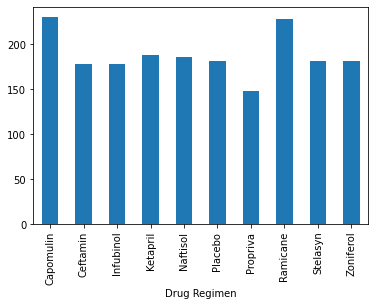

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = pd.DataFrame(merged_complete.groupby("Drug Regimen").count()["Mouse ID"])
bar_data.plot.bar(legend=None)
bar_data = pd.DataFrame(bar_data["Mouse ID"].sort_values(ascending = False))
bar_data

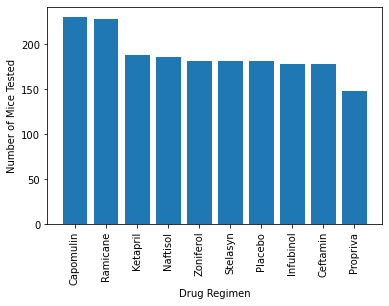

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_data.index,bar_data["Mouse ID"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

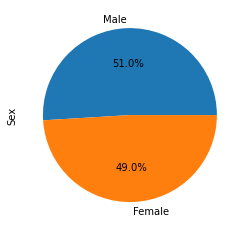

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = merged_complete["Sex"].value_counts()
df = pd.DataFrame({"Gender": counts.index, "Sex": counts.values})
df.plot.pie(y="Sex", labels=df["Gender"],autopct="%0.1f%%", legend=None)
plt.show()


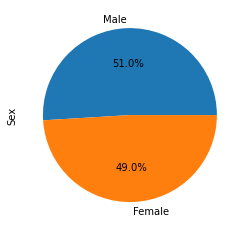

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = merged_complete['Sex'].value_counts()
labels = counts.index
sizes = counts.values
plt.pie(sizes, labels=labels, autopct='%0.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = merged_complete.groupby("Mouse ID").max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = max_timepoint.merge(merged_complete, on=['Mouse ID', 'Timepoint'], how='left')
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for treatment in treatments:
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # Add tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    

    if len(outliers) > 0:
        print(f"Potential outliers for {treatment} treatment: {outliers.values}")
    else:
        print(f"No potential outliers found for {treatment} treatment.")


No potential outliers found for Capomulin treatment.
No potential outliers found for Ramicane treatment.
Potential outliers for Infubinol treatment: [36.3213458]
No potential outliers found for Ceftamin treatment.


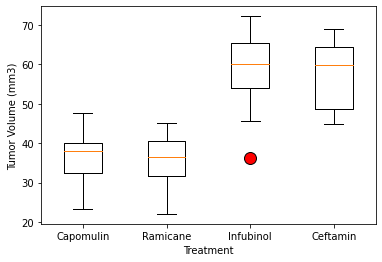

In [18]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, flierprops=flierprops)

ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

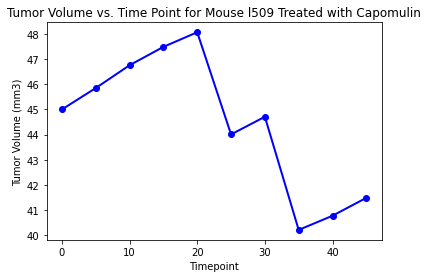

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'l509'
mouse_data = merged_complete.loc[(merged_complete['Mouse ID'] == mouse_id) & (merged_complete['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linewidth=2)

plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

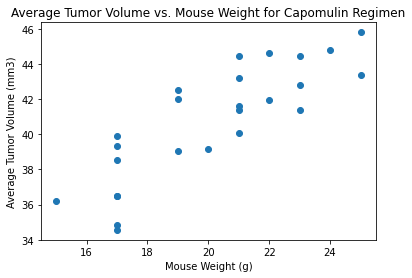

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = merged_complete.loc[merged_complete['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

x = average_tumor_volume["Weight (g)"]
y = average_tumor_volume["Tumor Volume (mm3)"]


plt.scatter(x,y)
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


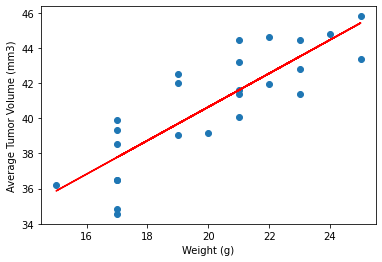

In [22]:
corr = round(x.corr(y),2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
plt.show()
